In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
import os

In [22]:
# import train_csv

import pandas as pd
classes = pd.read_csv('../input/planets-dataset/planet/planet/train_classes.csv')

In [23]:
#split the various tags in train_csv
classes['splitted tags'] = classes['tags'].apply(lambda x: x.split())


In [24]:
# combine all tags into a set to know the unique number of tags
combine_list = []
for i, n in enumerate(classes['splitted tags']):
    combine_list.extend(n)
combine_set = set(combine_list) 
len(combine_set)

17

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

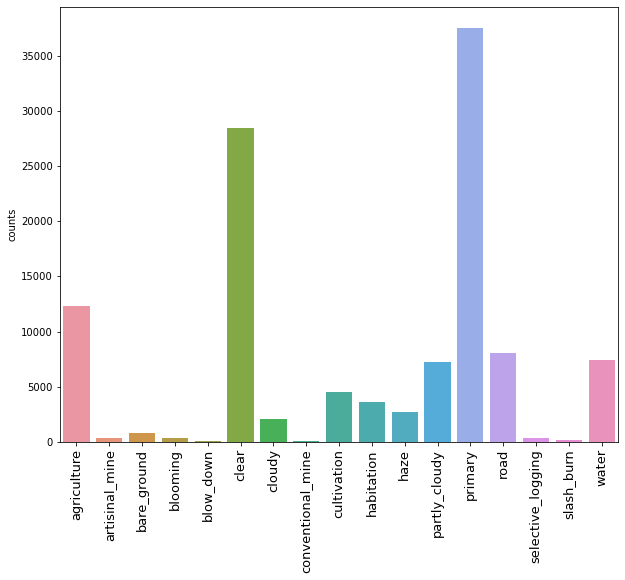

In [25]:
#visualize how frequent the different labels occur

from collections import Counter
count_dic = Counter(sorted(combine_list))
count_df = pd.DataFrame(count_dic, index = ['counts']).T
plt.figure(figsize=(10, 8))
sns.barplot(x=count_df.index, y= count_df['counts'])
plt.xticks(rotation= 90, fontsize = 13)

In [26]:
# get the probabilities for each label

import numpy as np
nd_values = np.array(list(count_dic.values()))
nd_values
probs = nd_values/np.sum(nd_values)
probs = (probs/0.32261476805586614) * 0.5
columns = sorted(list(combine_set))
prob_dic = dict(zip(columns, probs))
prob_dic

{'agriculture': 0.16414309705968597,
 'artisinal_mine': 0.004518433609681976,
 'bare_ground': 0.01148935035854237,
 'blooming': 0.004425132620691493,
 'blow_down': 0.0013461999840055445,
 'clear': 0.37894863114120436,
 'cloudy': 0.027843680857302797,
 'conventional_mine': 0.0013328712712926184,
 'cultivation': 0.060605656705675366,
 'habitation': 0.048783088529309834,
 'haze': 0.03594753818676192,
 'partly_cloudy': 0.09677978300855702,
 'primary': 0.5,
 'road': 0.10757604030602724,
 'selective_logging': 0.004531762322394903,
 'slash_burn': 0.0027857009570015725,
 'water': 0.09877908991549594}

In [27]:
# building the train_labels

train_labels = pd.DataFrame(np.zeros((40479, 17)), columns = columns)
train_labels

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# assign ones to rows for each column(label) that appears in the tags for that row
for n, lists in tqdm(enumerate(classes['splitted tags'])):
    for column in lists:
        train_labels[column][n]=1


40479it [00:31, 1304.85it/s]


In [29]:
# adding an image column to the train labels

train_labels['image_name'] = classes['image_name'] + '.jpg'
train_labels

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water,image_name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,train_0.jpg
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,train_1.jpg
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,train_2.jpg
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,train_3.jpg
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,train_4.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,train_40474.jpg
40475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_40475.jpg
40476,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,train_40476.jpg
40477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,train_40477.jpg


In [30]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.applications import VGG16
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

In [31]:
# defining the metric value function
from keras import backend

def fbeta(y_true, y_pred, beta=2):
    #clip predictions
    y_pred = backend.clip(y_pred, 0, 1)
    # calculate elements
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis = 1)
    fp = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis = 1)
    fn = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis = 1)
    
    # calculate precision
    p = tp/(tp + fp + backend.epsilon())
    #calculate recall
    r = tp / (tp + fn + backend.epsilon())
    #calculate fbeta
    bb = beta ** 2
    fbeta_score = backend.mean((1+ bb) * (p * r)/ (bb * p + r + backend.epsilon()))
    return fbeta_score

In [32]:
# Creating Datagen for both train and validation data

train_datagen = ImageDataGenerator(featurewise_center = True, 
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 90)
val_datagen = ImageDataGenerator(featurewise_center = True)
train_datagen.mean = [123.68, 116.779, 103.939]
val_datagen.mean= [123.68, 116.779, 103.939]


In [33]:
columns

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [34]:
# creating a scaled iterator to feed into model
train_it = train_datagen.flow_from_dataframe(train_labels[: 30479], 
                                             directory = '../input/planets-dataset/planet/planet/train-jpg', 
                                             x_col = 'image_name', y_col = columns, 
                                             class_mode= 'raw', batch_size = 64, target_size = (128, 128))
val_it = val_datagen.flow_from_dataframe(train_labels[30479:], 
                          directory = '../input/planets-dataset/planet/planet/train-jpg', 
                          x_col = 'image_name', 
                          y_col = columns,
                          class_mode= 'raw', 
                          batch_size = 64, target_size = (128, 128))


Found 30479 validated image filenames.
Found 10000 validated image filenames.


In [35]:
len(train_it)

477

In [36]:
import gc
gc.collect()

100

In [37]:

# model = Sequential()
# model.add(Conv2D(32, (3,3), padding = 'same', input_shape=(128, 128, 3)))
# model.add(Conv2D(32, (3,3), padding = 'same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3), padding='same'))
# model.add(Conv2D(64, (3,3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Conv2D(128, (3,3), padding='same'))
# model.add(Conv2D(128, (3,3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Flatten())

# model.add(Dense(128))
# model.add(Activation('relu'))

# model.add(Dense(17))
# model.add(Activation('sigmoid'))
# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[fbeta])

# history = model.fit_generator(train_it, steps_per_epoch = len(train_it), epochs = 30, 
#                               validation_data= val_it, validation_steps = len(val_it))

In [38]:
# load model
model = VGG16(include_top = False, input_shape= (128, 128, 3))

# define droputs
dropout1 = Dropout(0.2)
dropout2 = Dropout(0.2)

# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False
    
# allow last vgg block to be trainable
model.get_layer('block5_conv1').trainable = True
model.get_layer('block5_conv2').trainable = True
model.get_layer('block5_conv3').trainable = True
model.get_layer('block5_pool').trainable= True

# add new classifier layers
conv_layer2 = Conv2D(64, (3,3), padding='same', activation = 'relu')(model.layers[-1].output)
conv_layer3 = Conv2D(64, (3,3), padding='same', activation = 'relu')(conv_layer2)
pool_layer2 = MaxPooling2D(pool_size=(2,2))(conv_layer3)
#x = dropout1(pool_layer2)
flat1 = Flatten()(pool_layer2)
class1 = Dense(128, activation='relu')(flat1)
#class_dropout = dropout2(class1)
output = Dense(17, activation='sigmoid')(class1)

# define new model
model = Model(inputs=model.inputs, outputs=output)
opt = Adam(lr=0.001)
reduc_lr = ReduceLROnPlateau(monitor = 'val_loss', factor= 0.2, patience=5, min_lr = 0.001)
# compile model
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = [fbeta])


58892288/58889256 [==============================] - 0s 0us/step


In [39]:
history = model.fit_generator(train_it, steps_per_epoch = len(train_it), validation_data = val_it, 
                             validation_steps = len(val_it), epochs = 25, callbacks = [reduc_lr])

Epoch 1/25
477/477 [==============================] - 264s 554ms/step - loss: 0.1769 - fbeta: 0.8334 - val_loss: 0.1389 - val_fbeta: 0.8730
Epoch 2/25
477/477 [==============================] - 238s 498ms/step - loss: 0.1363 - fbeta: 0.8789 - val_loss: 0.1276 - val_fbeta: 0.8879
Epoch 3/25
477/477 [==============================] - 235s 494ms/step - loss: 0.1257 - fbeta: 0.8882 - val_loss: 0.1212 - val_fbeta: 0.8993
Epoch 4/25
477/477 [==============================] - 234s 491ms/step - loss: 0.1191 - fbeta: 0.8951 - val_loss: 0.1178 - val_fbeta: 0.8961
Epoch 5/25
477/477 [==============================] - 234s 490ms/step - loss: 0.1175 - fbeta: 0.8954 - val_loss: 0.1100 - val_fbeta: 0.9000
Epoch 6/25
477/477 [==============================] - 235s 493ms/step - loss: 0.1150 - fbeta: 0.8980 - val_loss: 0.1148 - val_fbeta: 0.9074
Epoch 7/25
477/477 [==============================] - 235s 492ms/step - loss: 0.1127 - fbeta: 0.9003 - val_loss: 0.1082 - val_fbeta: 0.9016
Epoch 8/25
477/477 [

In [40]:
model.save('semifinal_model')

In [41]:
# from keras.models import load_model
# load_model('/kaggle/working/semifinal_model.h5', custom_objects = {'fbeta': fbeta})

In [42]:
import gc
gc.collect()

28

In [43]:
# appending all test images from both test-jpg and test additional with their respective file path
# to use for predictions

#import numpy as np
test_images = []
for img1 in os.listdir('../input/planets-dataset/planet/planet/test-jpg'):
    test_images.append('../input/planets-dataset/planet/planet/test-jpg/{}'.format(img1))
for image in os.listdir('../input/planets-dataset/test-jpg-additional/test-jpg-additional'):
    test_images.append('../input/planets-dataset/test-jpg-additional/test-jpg-additional/{}'.format(image))

In [44]:
test_labels = pd.DataFrame(test_images, columns = ['image_names'])
test_labels

,image_names
0,../input/planets-dataset/planet/planet/test-jp...
1,../input/planets-dataset/planet/planet/test-jp...
2,../input/planets-dataset/planet/planet/test-jp...
3,../input/planets-dataset/planet/planet/test-jp...
4,../input/planets-dataset/planet/planet/test-jp...
...,...
61186,../input/planets-dataset/test-jpg-additional/t...
61187,../input/planets-dataset/test-jpg-additional/t...
61188,../input/planets-dataset/test-jpg-additional/t...
61189,../input/planets-dataset/test-jpg-additional/t...


In [45]:
# creating datagen and terator/generator for test data

test_datagen = ImageDataGenerator(featurewise_center= True)
test_datagen.mean = [123.68, 116.779, 103.939]
test_generator= test_datagen.flow_from_dataframe(test_labels, directory = None,
                                                 x_col = 'image_names', 
                                                 y_col = None, batch_size = 64, 
                                                 class_mode=None, target_size=(128, 128), 
                                                 shuffle = False)

Found 61191 validated image filenames.


In [46]:
# making predictions

test_generator.reset()
pred = model.predict_generator(test_generator, steps = len(test_generator))

In [61]:
predictions = pd.DataFrame(pred, columns = columns)

In [48]:
predictions

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,0.038182,2.076262e-05,0.000832,1.766616e-02,1.070324e-02,0.086966,5.139440e-05,3.642135e-06,0.031980,0.003706,0.000974,0.906072,0.999624,0.008849,0.004883,2.621406e-04,0.025276
1,0.269837,5.984112e-04,0.020821,1.788417e-02,1.877113e-02,0.184991,1.583575e-02,4.476015e-04,0.124709,0.019301,0.164288,0.617136,0.978951,0.044176,0.009150,5.150658e-03,0.075810
2,0.021254,6.166134e-06,0.000235,1.255468e-02,3.904185e-03,0.004570,1.371299e-04,2.213964e-07,0.012011,0.001182,0.000338,0.992402,0.999946,0.008595,0.001272,9.945859e-05,0.017148
3,0.024226,2.559549e-05,0.000470,3.647924e-03,2.087996e-03,0.000382,3.185937e-04,4.991890e-07,0.015281,0.001245,0.000035,0.998174,0.999367,0.005860,0.001110,2.610103e-04,0.025595
4,0.006003,9.674857e-09,0.000029,2.460251e-02,3.034379e-04,0.987642,3.518030e-07,4.974633e-10,0.005126,0.000994,0.004897,0.001422,0.999999,0.000767,0.001056,4.153990e-07,0.001782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61186,0.081670,5.481260e-06,0.002556,3.090586e-02,1.370819e-02,0.968965,1.194406e-06,7.025574e-07,0.048243,0.005888,0.004252,0.011916,0.999949,0.007882,0.007484,1.720950e-04,0.015095
61187,0.025403,5.108851e-07,0.000241,7.973950e-07,2.704195e-08,0.001332,9.014611e-01,5.382661e-09,0.004417,0.002409,0.002935,0.107384,0.106643,0.004535,0.000004,3.062110e-07,0.032420
61188,0.941868,2.545903e-04,0.022645,1.510699e-04,2.879553e-04,0.777331,5.175823e-09,5.452019e-05,0.556476,0.250771,0.007406,0.224333,0.999712,0.142339,0.000865,3.776610e-02,0.033856
61189,0.296690,4.406995e-04,0.010930,1.674407e-04,2.000883e-05,0.970989,4.445594e-07,1.979257e-04,0.050130,0.027993,0.003992,0.007453,0.998897,0.092126,0.000526,2.417271e-04,0.988706


In [51]:
# for column, threshold in zip(predictions.columns, prob_dic.values()):
#     col_list = predictions[column].to_list()
#     predictions[column] = [1 if i >= threshold else 0 for i in col_list ]
# predictions                             

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0
1,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,0
2,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61186,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0
61187,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
61188,1,0,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0
61189,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [70]:
# defining functions that will iterate through each row and 
# join columns that are ones based on the threshold

def get_columns_ones(df, n, threshold = 0.2):
    d = dict(zip(df.columns, list(df.iloc[n])))
    # extract keys of dict with ones
    l = [k for k, v in d.items() if v >= threshold]
    result = ' '.join(l)
    return result

In [71]:
# applying the function to the predictions

predictions2 = predictions.copy()
predictions2['tags'] = 0
for i in predictions2.index:
    predictions2['tags'][i] = get_columns_ones(predictions, i)
predictions2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water,tags
0,0.038182,2.076262e-05,0.000832,1.766616e-02,1.070324e-02,0.086966,5.139440e-05,3.642135e-06,0.031980,0.003706,0.000974,0.906072,0.999624,0.008849,0.004883,2.621406e-04,0.025276,partly_cloudy primary
1,0.269837,5.984112e-04,0.020821,1.788417e-02,1.877113e-02,0.184991,1.583575e-02,4.476015e-04,0.124709,0.019301,0.164288,0.617136,0.978951,0.044176,0.009150,5.150658e-03,0.075810,agriculture clear haze partly_cloudy primary
2,0.021254,6.166134e-06,0.000235,1.255468e-02,3.904185e-03,0.004570,1.371299e-04,2.213964e-07,0.012011,0.001182,0.000338,0.992402,0.999946,0.008595,0.001272,9.945859e-05,0.017148,partly_cloudy primary
3,0.024226,2.559549e-05,0.000470,3.647924e-03,2.087996e-03,0.000382,3.185937e-04,4.991890e-07,0.015281,0.001245,0.000035,0.998174,0.999367,0.005860,0.001110,2.610103e-04,0.025595,partly_cloudy primary
4,0.006003,9.674857e-09,0.000029,2.460251e-02,3.034379e-04,0.987642,3.518030e-07,4.974633e-10,0.005126,0.000994,0.004897,0.001422,0.999999,0.000767,0.001056,4.153990e-07,0.001782,clear primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61186,0.081670,5.481260e-06,0.002556,3.090586e-02,1.370819e-02,0.968965,1.194406e-06,7.025574e-07,0.048243,0.005888,0.004252,0.011916,0.999949,0.007882,0.007484,1.720950e-04,0.015095,clear primary
61187,0.025403,5.108851e-07,0.000241,7.973950e-07,2.704195e-08,0.001332,9.014611e-01,5.382661e-09,0.004417,0.002409,0.002935,0.107384,0.106643,0.004535,0.000004,3.062110e-07,0.032420,cloudy
61188,0.941868,2.545903e-04,0.022645,1.510699e-04,2.879553e-04,0.777331,5.175823e-09,5.452019e-05,0.556476,0.250771,0.007406,0.224333,0.999712,0.142339,0.000865,3.776610e-02,0.033856,agriculture clear cultivation habitation partl...
61189,0.296690,4.406995e-04,0.010930,1.674407e-04,2.000883e-05,0.970989,4.445594e-07,1.979257e-04,0.050130,0.027993,0.003992,0.007453,0.998897,0.092126,0.000526,2.417271e-04,0.988706,agriculture clear primary water


In [72]:
# separate the file paths from the test image names

predictions2['image_name'] = test_labels['image_names'].apply(lambda x: x.split('/')[-1])
predictions2['image_name'] = predictions2['image_name'].apply(lambda x: x.split('.')[0])

In [73]:
predictions2 = predictions2[['image_name', 'tags']]

In [74]:
predictions2

,image_name,tags
0,test_19444,partly_cloudy primary
1,test_6644,agriculture clear haze partly_cloudy primary
2,test_19524,partly_cloudy primary
3,test_16697,partly_cloudy primary
4,test_20036,clear primary
...,...,...
61186,file_6688,clear primary
61187,file_15179,cloudy
61188,file_8403,agriculture clear cultivation habitation partl...
61189,file_1385,agriculture clear primary water


In [75]:
submission = pd.read_csv('../input/planets-dataset/planet/planet/sample_submission.csv')


In [76]:
# merging predictions and submission dataframes to get the format for submission

new_submissions = pd.merge(submission, predictions2, on='image_name', how='left')

In [77]:
new_submissions.columns = ['image_name', 'remove', 'tags']
new_submission = new_submissions.drop(columns= 'remove')

In [78]:
# converting ultimate submission dataframe to a csv file
new_submission.to_csv('submission.csv', index=False)

![img](fifth.png)

![img2](sixth.png)